In [3]:
import pandas as pd

In [4]:
advertising = pd.read_csv('tvmarketing.csv')

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

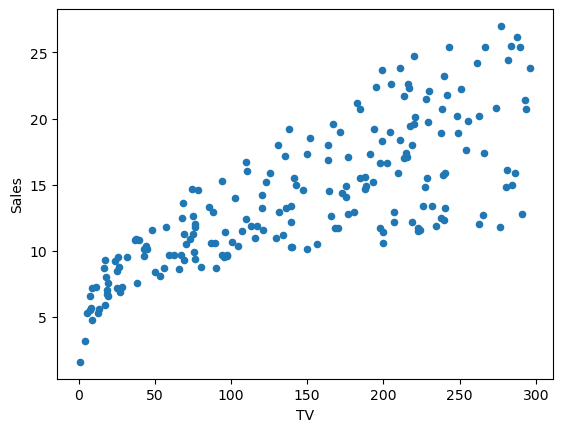

In [8]:
# Visualise the relationship between the features and the response using scatterplots
advertising.plot(x='TV',y='Sales',kind='scatter')

# Putting feature variable to X
X = advertising['TV']

# Print the first 5 rows
X.head()
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()


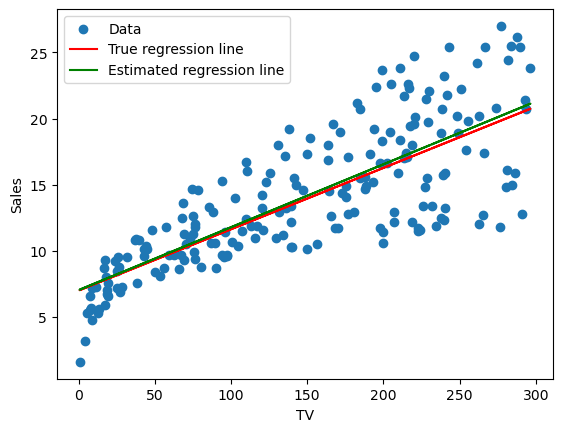

MAP estimate:
Slope: 0.047564816416289464
Intercept: 7.027045073093136


In [10]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'data' with columns 'TV' and 'Sales'
# Replace 'your_data.csv' with the actual file path if you're reading from a CSV file
data = pd.read_csv('tvmarketing.csv')

# Extracting data
X = data['TV'].values
y = data['Sales'].values

# True values for demonstration purposes
true_slope = 0.0464
true_intercept = 6.989
y_true = true_slope * X + true_intercept

# Bayesian Linear Regression Model
with pm.Model() as model:
    slope = pm.Normal('Slope', mu=0, sd=10)
    intercept = pm.Normal('Intercept', mu=0, sd=10)
    
    # Linear regression model
    y_pred = slope * X + intercept
    
    # Likelihood (Normal distribution)
    likelihood = pm.Normal('y', mu=y_pred, sd=2.0, observed=y)

# Finding the Maximum A Posteriori (MAP) estimate
with model:
    map_estimate = pm.find_MAP()

# Plotting
plt.scatter(X, y, label='Data')
plt.plot(X, y_true, label='True regression line', color='red')
plt.plot(X, map_estimate['Slope'] * X + map_estimate['Intercept'], label='Estimated regression line', color='green')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

print('MAP estimate:')
print('Slope:', map_estimate['Slope'])
print('Intercept:', map_estimate['Intercept'])


In [ ]:
#   https://www.kaggle.com/datasets/devzohaib/tvmarketingcsv/
#   https://www.kaggle.com/code/devzohaib/simple-linear-regression